In [128]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

import pickle
import string

# Text Processing libraries
import nltk
from nltk.stem import PorterStemmer


In [130]:
data = pd.read_csv('C:/Users/muema/Suicide_Detection.csv')
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


# Data Preprocessing

In [131]:
data.shape

(232074, 3)

- The given dataset contain more than 200000 rows.
- It takes take significant time and resources, as it involves optimizing the parameters of the model and processing the data iteratively.
- So I will take 10000 data points which will help to reduce complexity.

In [132]:
df = data.sample(n=10000, random_state=42)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 74414 to 224640
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   text        10000 non-null  object
 2   class       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


In [134]:
df['Unnamed: 0'].is_unique

True

In [135]:
df.drop(columns = 'Unnamed: 0',inplace=True)

In [136]:
df.head()

,text,class
74414,I Don't know?7? Months self harm free and the ...,suicide
149516,I HAVE TO START BECOMING RICH I HAVE TO START ...,non-suicide
12484,"A poem (haiku) for u/Me-Game-Dev hi, hello hel...",non-suicide
14043,I've honestly got no idea what to do anymore.I...,suicide
30673,Do you ever just cry? Like you just think abou...,non-suicide


In [137]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [139]:
df.duplicated().sum()

0

# Data Visualisation

class
non-suicide    5048
suicide        4952
Name: count, dtype: int64


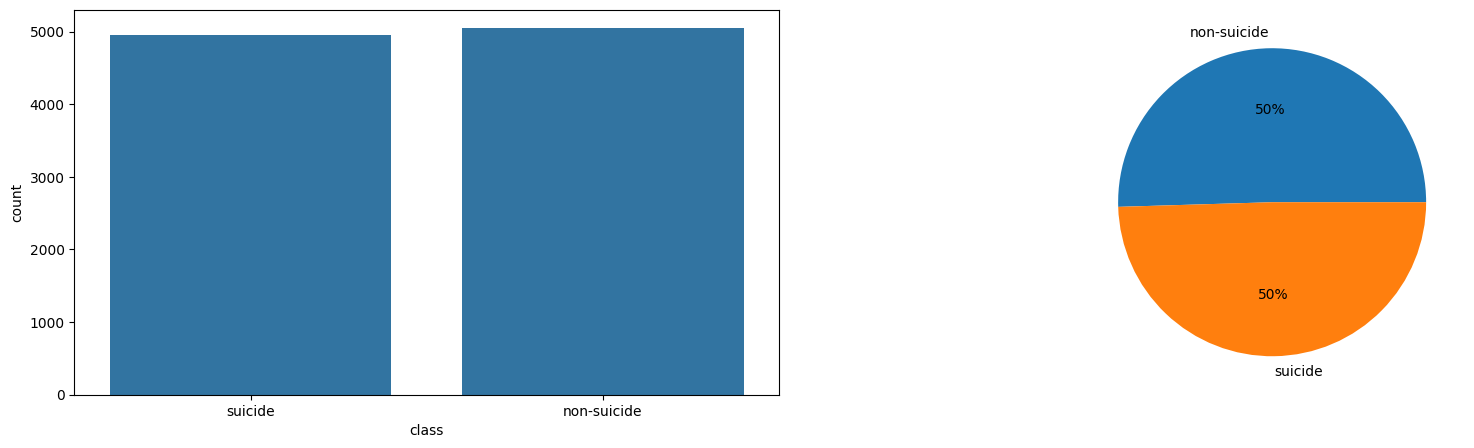

In [140]:
classCnt = df['class'].value_counts()
print(classCnt)

plt.figure(figsize=((20,5)))

plt.subplot(1,2,1)
sns.countplot(df,x='class')

plt.subplot(1,2,2)
plt.pie(classCnt,labels = classCnt.index,autopct='%.0f%%')

plt.show()

# Text Preprocessing

## Lowering the Text
- Changing the case involves converting all text to lowercase or uppercase so that all word strings follow a consistent format. 
- Lowercasing is the more frequent choice in NLP software.

In [141]:
df['text']= df['text'].str.lower()

## Remove Punctuations
- Text preprocessing involves various techniques to clean and transform raw text data into a more suitable format for analysis.
- Removing punctuation is one of the most commonly used preprocessing techniques, as punctuation marks do not usually add much semantic value to the text and can interfere with downstream NLP tasks.
-  String library of Python contains some pre-defined list of punctuations such as **‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’**

In [142]:
df['text'] = df['text'].str.replace(r'[^\w\s]+', '',regex = True)

## Stop word removal

- Stopwords are the most commonly occurring words in a language, such as "the", "and", "a", "an", "in", "to", etc. 
- These words have very little semantic value and are often used to connect meaningful words in a sentence. 
- In many natural language processing (NLP) tasks, stopwords can be removed without affecting the meaning of the text, and doing so can actually improve the performance of the NLP models.

In [143]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

## Tokenization   
- The tokenization stage involves converting a sentence into a stream of words, also called “tokens.”
- Tokens are usually words, but they can also be phrases, symbols, or other meaningful units of text.

In [144]:
df['text'] = df['text'].apply(lambda x:nltk.word_tokenize(x))

## Stemming
- The term word stem is borrowed from linguistics and used to refer to the base or root form of a word.
- Stemming is the process of converting all words to their base form, or stem. 

In [145]:
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x : [ps.stem(i) for i in x])

In [146]:
df['text']=df['text'].apply(lambda x : ' '.join(x))

In [147]:
df.head()

,text,class
74414,dont know7 month self harm free urg get strong...,suicide
149516,start becom rich start compani becom 16 afford...,non-suicide
12484,poem haiku umegamedev hi hello hello stop fuck...,non-suicide
14043,ive honestli got idea anymoreit feel everyon f...,suicide
30673,ever cri like think unfair life cri cant cri e...,non-suicide


In [148]:
# Saved the cleaned dataset.
df.to_csv('SuicideFile.csv')

In [149]:
dfnew = pd.read_csv('SuicideFile.csv')
dfnew.head()

,Unnamed: 0,text,class
0,74414,dont know7 month self harm free urg get strong...,suicide
1,149516,start becom rich start compani becom 16 afford...,non-suicide
2,12484,poem haiku umegamedev hi hello hello stop fuck...,non-suicide
3,14043,ive honestli got idea anymoreit feel everyon f...,suicide
4,30673,ever cri like think unfair life cri cant cri e...,non-suicide


In [150]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   text        9999 non-null   object
 2   class       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [151]:
ind = dfnew[dfnew['text'].isnull()].index

In [152]:
df.iloc[ind]

,text,class
102482,,suicide


- **'text'** column contains None values.
- It may contain puctuations or emojies.
- So I am going to drop that row

In [153]:
dfnew.dropna(inplace=True)

# Machine Learning - Model Selection

In [154]:
x,y = dfnew['text'],dfnew['class']

## TF-IDF Vectorizer

In [155]:
vectorizer = TfidfVectorizer(min_df=50,max_features=5000)
x =  vectorizer.fit_transform(x).toarray()

In [156]:
# Save the model
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)    

In [157]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=5)

In [158]:
X_train.shape,X_test.shape

((6999, 1320), (3000, 1320))

## Naive Bayes (Voting Classifier)

In [159]:
nb = GaussianNB()
nb2 = BernoulliNB()
nb3 = MultinomialNB()
VotingClassifiers = VotingClassifier(estimators=[('GaussianNB', nb),('BernoulliNB',nb2), ('MultinomialNB', nb3)], voting = 'soft')
VotingClassifiers.fit(X_train, y_train)
print('Training score:',VotingClassifiers.score(X_train, y_train))
print('Testing score:',VotingClassifiers.score(X_test,y_test))

Training score: 0.899271324474925
Testing score: 0.8753333333333333


              precision    recall  f1-score   support

 non-suicide       0.88      0.88      0.88      1542
     suicide       0.87      0.87      0.87      1458

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



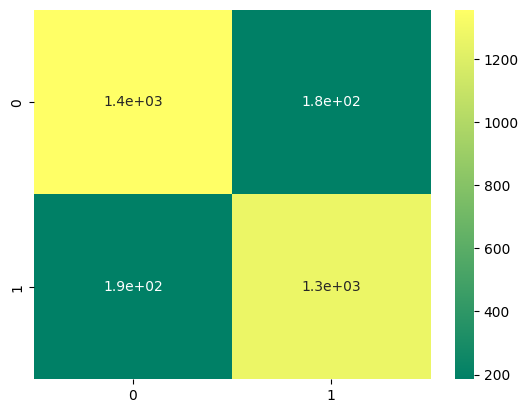

In [160]:
y_act=y_test
y_pred=VotingClassifiers.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer')
print(classification_report(y_act,y_pred))

In [199]:
pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

In [182]:
# New statements to predict sentiment for
new_statements = ["I felt that life was meaningless."]

# Convert new statements to numerical representations
new_data = vectorizer.transform(new_statements).toarray()


# Make predictions
predictions_new = VotingClassifiers.predict(new_data)

# Print predictions and their corresponding sentiment labels
for statement, prediction in zip(new_statements, predictions_new):
    if prediction == 0:
        sentiment = "Suicidal"
    else:
        sentiment = "Non-Suicidal"


    print(f"Statement: {statement}")
    print(f"Predicted Sentiment: {sentiment}")


Statement: I felt that life was meaningless.
Predicted Sentiment: Non-Suicidal


In [191]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

user_input_text = "I want to kill myself."

# Preprocess the user input text (make sure to use the same preprocessing as your training data)
def preprocess(inp):
    inp = inp.lower()  # Convert to lower case
    inp = inp.replace(r'[^\w\s]+', '')  # Remove punctuations
    inp = [word for word in inp.split() if word not in ENGLISH_STOP_WORDS]  # Tokenize the sentence
    inp = ' '.join([PorterStemmer().stem(i) for i in inp])  # Stemming
    return inp

text = preprocess(user_input_text)

# For example, if you used CountVectorizer for text processing during training:
X_new = vectorizer.transform([text])

# Convert the sparse matrix to a dense numpy array
X_new_dense = X_new.toarray()

# Use the trained model to predict
prediction = VotingClassifiers.predict(X_new_dense)

# Display the prediction
if prediction == 1:
    print("The model predicts that the user may be suicidal.")
else:
    print("The model predicts that the user is not suicidal.")

The model predicts that the user is not suicidal.


In [198]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier

def text_to_vector(text):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform([text]) # ensure 'text' is a single string and not a list of strings
    feature_names = vectorizer.get_feature_names_out()
    return X, feature_names

text = "I want to kill myself"
X, feature_names = text_to_vector(text)

# convert sparse matrix to dense numpy array
X = X.toarray()

prediction = VotingClassifiers.predict(X)
print(prediction)

ValueError: X has 2 features, but GaussianNB is expecting 1320 features as input.

## Random Forest

In [161]:
classifiers = RandomizedSearchCV(RandomForestClassifier(),{'n_estimators':[4,5],'criterion':['entropy'],
                                                      'max_depth':range(1,4),'min_samples_split':range(2,5)},random_state=12)
classifiers.fit(X_train, y_train)
print('Training score:',classifiers.score(X_train, y_train))
print('Testing score:',classifiers.score(X_test,y_test))
print(classifiers.best_estimator_)

Training score: 0.7741105872267466
Testing score: 0.7646666666666667
RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=4,
                       n_estimators=4)


              precision    recall  f1-score   support

 non-suicide       0.74      0.85      0.79      1542
     suicide       0.81      0.68      0.74      1458

    accuracy                           0.76      3000
   macro avg       0.77      0.76      0.76      3000
weighted avg       0.77      0.76      0.76      3000



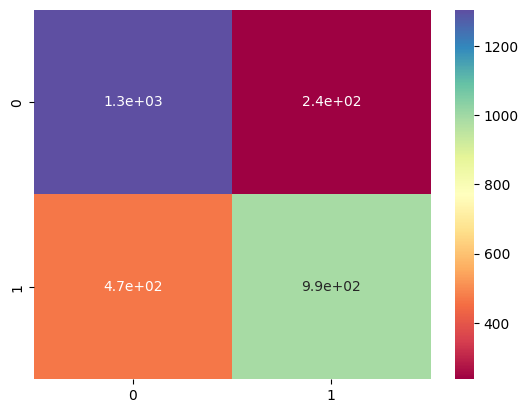

In [162]:
y_act=y_test
y_pred=classifiers.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral')
print(classification_report(y_act,y_pred))

## Decision Tree

In [163]:
model2 = DecisionTreeClassifier(criterion='gini',splitter='random',min_samples_leaf=70,max_depth=4,random_state=0)
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test,y_test))

0.7485355050721532
0.7526666666666667


              precision    recall  f1-score   support

 non-suicide       0.74      0.80      0.77      1542
     suicide       0.77      0.70      0.73      1458

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



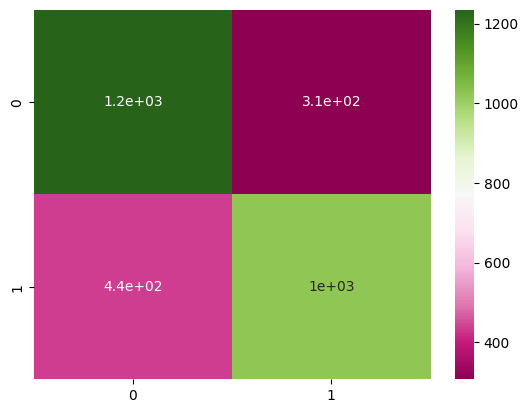

In [164]:
y_act=y_test
y_pred=model2.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PiYG')
print(classification_report(y_act,y_pred))

In [202]:
test_sample = X_test[9]
predicted_target = model2.predict([test_sample])
print(f"Prediction: {predicted_target}")

Prediction: ['suicide']


In [170]:
# save the Model
with open('DTreeSuicideModel.pkl', 'wb') as f:
    pickle.dump(model2, f)   

## Gradient Boosting

In [ ]:
model3 = RandomizedSearchCV(GradientBoostingClassifier(),{"learning_rate": range(3,5),
                "max_depth":[200],"max_features":range(6,10,2),
                 "n_estimators":[10]},random_state=8,n_jobs=-1)
model3.fit(X_train,y_train)
print('Training score:',model3.score(X_train,y_train))
print('Testing score:',model3.score(X_test,y_test))
model3.best_params_

In [ ]:
#confusion matrix and classification report
y_act=y_test
y_pred=model3.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PRGn')
print(classification_report(y_act,y_pred))

## XG Boost

In [ ]:
model = XGBClassifier( eval_metric='map',max_depth=200,n_estimators=70,learning_rate=1.99)
model.fit(X_train,y_train.replace({"non-suicide":0,'suicide':1}))
print('Training score:',model.score(X_train,y_train.replace({"non-suicide":0,'suicide':1})))
print('Testing score:',model.score(X_test,y_test.replace({"non-suicide":0,'suicide':1})))

In [ ]:
#confusion matrix and classification report
y_act = y_test.replace({"non-suicide":0,'suicide':1})
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral')
print(classification_report(y_act,y_pred))

## K-Nearest Neighbour

In [ ]:
model = RandomizedSearchCV(KNeighborsClassifier(),{'n_neighbors':[8],'metric':['manhattan','minkowski','cosine','tanimoto'],
                                                   'p':[1,2]},random_state=42,n_jobs=-1)
model.fit(X_train, y_train)
print('Training score:',model.score(X_train, y_train))
print('Testing score:',model.score(X_test,y_test))
print(model.best_estimator_)

In [ ]:
y_act = y_test
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer')
print(classification_report(y_act,y_pred))

# Conclusion

- From the above we can say that out of all models, **Naive Bayes (Voting Classifier)**  is best fit model for the dataset.
+ Training score: 0.899271324474925
* Testing score: 0.8753333333333333

In [ ]:
# save the Model
with open('NVBSuicideModel.pkl', 'wb') as f:
    pickle.dump(VotingClassifiers, f)    

In [ ]:
def preprocess(inp):
    inp = inp.lower() #convert to lower case 
    inp = inp.replace(r'[^\w\s]+', '') #remove punctuations
    inp = [word for word in inp.split() if word not in (stop_words)] #tokenize the sentence
    inp = ' '.join([ps.stem(i) for i in inp]) #stremming
    inputToModel = vectorizer.transform([inp]).toarray() #transform to vector form
    return inputToModel

In [ ]:
def app(input_text):
    # Define the input text box
    print('Input : ',input_text) #take input from user
    processed_array = preprocess(input_text) #preprocess the text 
    predict = VotingClassifiers.predict(processed_array) #Model prediction
    print('Output : ', predict[0])

In [ ]:
app('i am tired of my life i want to end my life')

In [ ]:
app('Have a nice day! Happy Coding😊')